# K均值图像压缩
### k均值实现

In [15]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 获取实验数据并展示分析

In [16]:
def getData(url):
    data=np.array(loadmat(url)['X'])
    return data

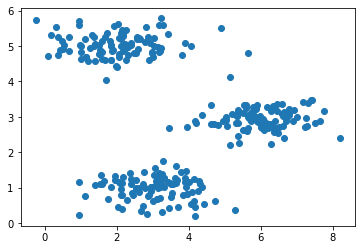

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [17]:
data=getData('./data/ex7data2.mat')
plt.scatter(data[:,0],data[:,1])
plt.show()
data[:5,:]


观察实验数据可知，本次的k均值实验要将数据分成三份，x在-1到9，y在0-6  
### 随机生成三个点作为中心

In [18]:
centerNum=3
x=np.random.random(centerNum)*10-1
y=np.random.random(centerNum)*6

### 生成一个数组，为数据集做聚类标识1，2，3

In [19]:
mark=np.zeros(data.shape[0])

### 为所有点重新分配中心

In [20]:
def reDistributionCenter(x,y,mark):
    notChange=True#标记是否已经聚类好，也就是notChange为true
    for i in range(data.shape[0]):
        min=100000
        minIndex=0
        for j in range(centerNum):#计算第i个点里那个中心最近
            l2=np.power(data[i,0]-x[j],2)+np.power(data[i,1]-y[j],2)
            if(l2<min):
                min=l2
                minIndex=j
        if(mark[i]!=minIndex+1):
            mark[i]=minIndex+1#把i点分配到距离最近的中心
            notChange=False#说明还有改变中心的点，
    return x,y,mark,notChange

### 重新计算聚类中心点

In [21]:
def computeNewCenter(x,y,mark):
    for i in range(centerNum):
        x[i]=data[mark==(i+1)][:,0].mean()
        y[i]=data[mark==(i+1)][:,1].mean()
    return x,y

### 不断循环分配中心点，计算新的中心点，直到不在分配中心点

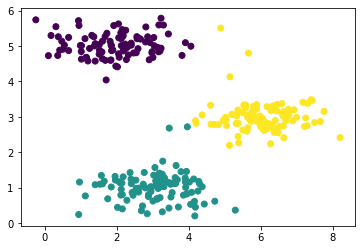

In [22]:
notChange=False
while(not notChange):
# print("分类前mark",mark)
    x,y,mark,notChange=reDistributionCenter(x,y,mark)#分配中心点
    x,y=computeNewCenter(x,y,mark)#计算新的中心点
# print("分类后mark",mark)
# print("聚类中心",x,y)
plt.scatter(data[:,0],data[:,1],c=mark)
plt.show()


## 图片压缩
### 读取图片

(4608, 3456, 3)


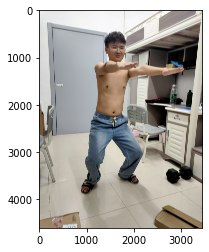

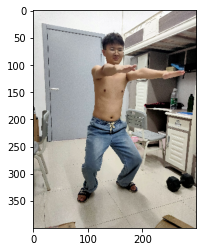

In [23]:
from skimage import io
pic = io.imread('data/dog.png')/255
print(pic.shape)
plt.imshow(pic)
plt.show()
pic_min=np.zeros((400,300,3))
for i1 in range(400):
    for i2 in range(300):
        pic_min[i1,i2,:]=pic[11*i1,11*i2,:]
plt.imshow(pic_min)
plt.show()
pic=pic_min

图像压缩的原理就是把颜色相近的颜色进行一个聚类，简化成一个颜色，以此达到压缩的目的  
即对颜色区别不明显的地方简化为一个色块  
代码方面，只需要将上述k均值算法的比较聚类中心的欧氏距离替换成RGB三个颜色通道即可
### 定义一个矩阵，为每个像素做标识

In [24]:
mark_image=np.zeros(pic.shape[:2])
mark_image.shape

(400, 300)

### 然后定义聚类中心的数量，即最终的颜色种类,初始化颜色

In [25]:
color_nums=16
color_center=np.random.random((color_nums,3))

### 为所有像素分配中心

In [26]:
def reDistributionPixelCenter(color_center,mark_image):
    notChange=True#标记是否已经聚类好，也就是notChange为true
    for i1 in range(pic.shape[0]):
        for i2 in range(pic.shape[1]):#遍历128*128个像素
            min=1518750
            minIndex=0
            for j in range(color_nums):#计算第i个像素离那个中心最近
                l2=np.power(pic[i1,i2,0]-color_center[j,0],2)+np.power(pic[i1,i2,1]-color_center[j,1],2)+np.power(pic[i1,i2,2]-color_center[j,2],2)
                if(l2<min):
                    min=l2
                    minIndex=j
            if(mark_image[i1,i2]!=minIndex):
                mark_image[i1,i2]=minIndex#把i点分配到距离最近的中心
                notChange=False#说明还有改变中心的点，并没有聚好
    return color_center,mark_image,notChange

### 重新计算像素中心

In [27]:
def computeNewPixelCenter(color_center,mark_image):
    for i in range(color_center.shape[0]):
        if(pic[mark_image[:,:]==i].shape[0]==0):#防止某一个中心没有元素，就重新随机生成中心
            color_center[i]=np.random.random((1,3))
        else:
            color_center[i]=pic[mark_image[:,:]==i].mean(axis=0)#取每种分类的均值做为新的中心
    return color_center

### 将图片压缩成16种颜色

1


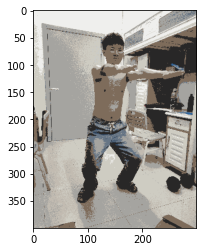

2


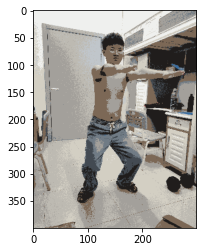

3


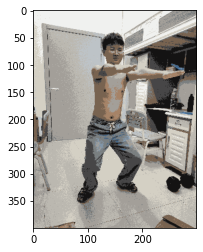

4


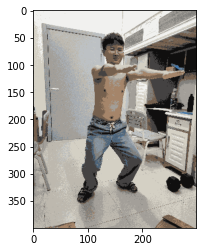

KeyboardInterrupt: 

In [28]:
notChange=False
epoch=0
while(not notChange):
    color_center,mark_image,notChange=reDistributionPixelCenter(color_center,mark_image)#为每个像素分配中心
    color_center=computeNewPixelCenter(color_center,mark_image)#重新计算中心
    epoch+=1

    print(epoch)#显示迭代次数    
    min_image=np.zeros(pic.shape)#构造出简化后的图片
    for i1 in range(min_image.shape[0]):
        for i2 in range(min_image.shape[1]):
            min_image[i1,i2,:]=color_center[int(mark_image[i1,i2]),:]
    plt.imshow(min_image)
    plt.show()

print("完成")

### 将图像压缩成8种颜色

1


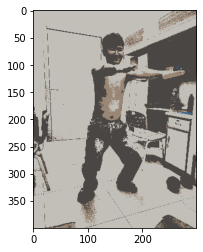

2


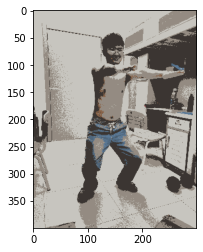

3


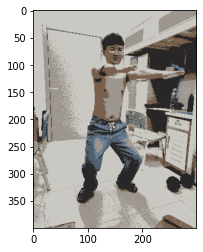

4


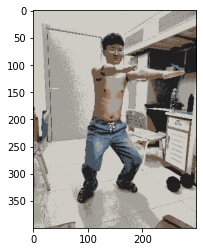

5


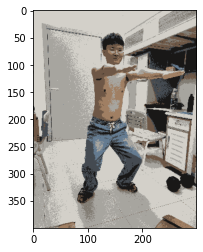

6


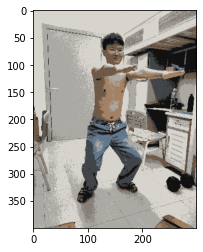

7


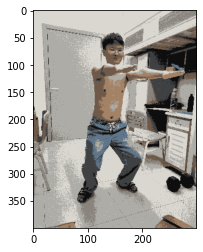

8


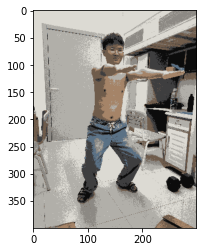

9


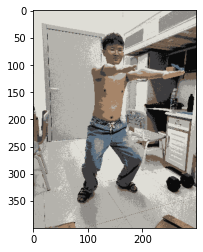

10


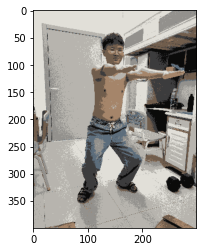

11


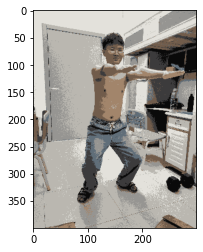

12


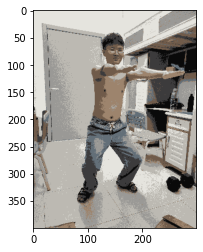

13


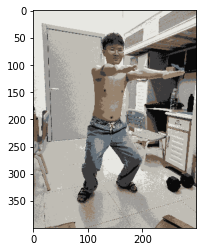

14


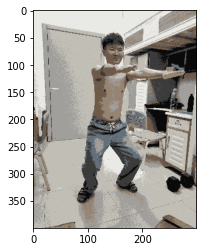

15


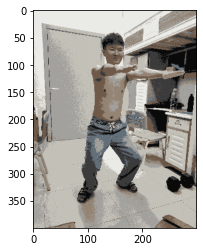

16


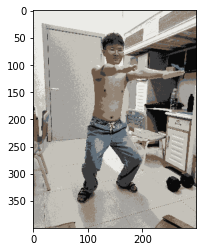

KeyboardInterrupt: 

In [30]:
color_nums=8
color_center=np.random.random((color_nums,3))

notChange=False
epoch=0
while(not notChange):
    color_center,mark_image,notChange=reDistributionPixelCenter(color_center,mark_image)
    color_center=computeNewPixelCenter(color_center,mark_image)
    epoch+=1

    print(epoch)    
    min_image=np.zeros(pic.shape)
    for i1 in range(min_image.shape[0]):
        for i2 in range(min_image.shape[1]):
            min_image[i1,i2,:]=color_center[int(mark_image[i1,i2]),:]
    plt.imshow(min_image)
    plt.show()

print("完成")